In [1]:
from sklearn import datasets        as d
from sklearn import model_selection as ms
import seaborn                      as sns

from keras.models     import Sequential, load_model
from keras.layers     import Dense
from keras.optimizers import SGD
from keras.callbacks  import EarlyStopping, ModelCheckpoint

from matplotlib import pyplot as plt

In [2]:
# criacao de dados circulares

X, y = d.make_circles( n_samples=1000, noise=0.1, factor=0.2 )  

In [3]:
# Full data ( 1000) -> 20% test ( 200 ) -> Generalization
#                    -> 80% training ( 800 )
#                    -> 80% training ( 640 ) e 20% validation ( 160 ) -> Aprendizado

C:\Users\Utente77\Anaconda3\envs\classificazione\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

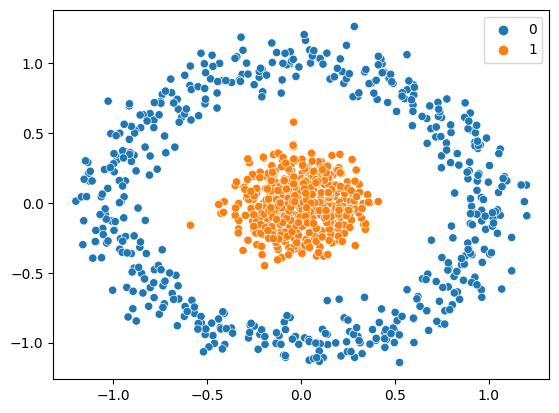

In [4]:
sns.scatterplot( X[:,0], X[:,1], hue=y )

# 1.0. MLP Training

In [5]:
# =========== 1 Epoca =============
# forward: dados * peso -> funcao de ativacao -> predito
# real - predito = erro
# backpropagation: erro -> derivas parciais -> update pesos

# =========== 2 Epoca =============
# forward: dados * peso -> funcao de ativacao -> predito
# real - predito = erro
# backpropagation: erro -> derivas parciais -> update pesos

C:\Users\Utente77\Anaconda3\envs\classificazione\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


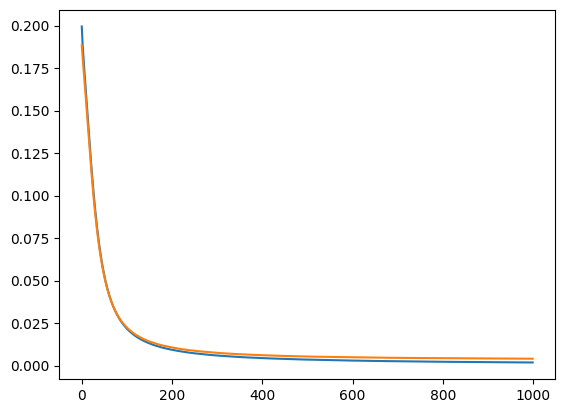

In [6]:
# split training into train and test dataset
x_train, x_val, y_train, y_val = ms.train_test_split( X, y, test_size=0.2 )

# Multi-Layer Perceptron
# model definition ( layers, neurons )
model = Sequential()

model.add( Dense( 4, input_dim=x_train.shape[1], activation='relu' ) ) # input layer, hidden layer
model.add( Dense( 1, activation='sigmoid' ) ) # output layer

# model compile ( loss, optimizer, metrics )
opt = SGD( lr=0.01, momentum=0.8 )
model.compile( loss='mean_squared_error', optimizer=opt, metrics=['accuracy'] )

# model training ( train, test, epocas)
history = model.fit( x_train, y_train, validation_data=(x_val, y_val), epochs=1000, verbose=0 )

# model accuracy
_, acc_train = model.evaluate( x_train, y_train, verbose=0 )
_, acc_val = model.evaluate( x_val, y_val, verbose=0 )

# learning Curve
plt.plot( history.history['loss'], label='training' )
plt.plot( history.history['val_loss'], label='validation' )

Training Acc: 1.000 - Validation Acc: 0.995


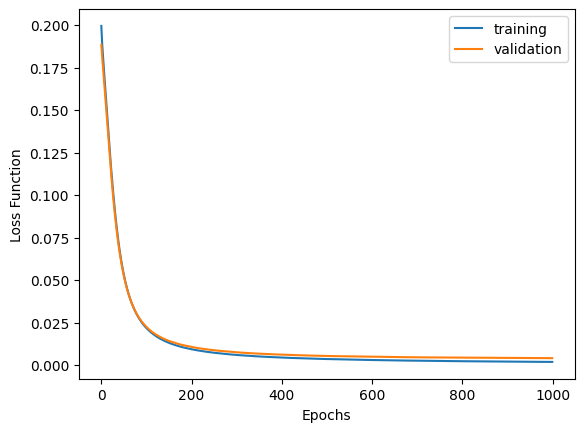

In [7]:

# model accuracy
_, acc_train = model.evaluate( x_train, y_train, verbose=0 )
_, acc_val = model.evaluate( x_val, y_val, verbose=0 )

print( 'Training Acc: {:.3f} - Validation Acc: {:.3f}'.format( acc_train, acc_val ) )

# learning Curve
plt.plot( history.history['loss'], label='training' )
plt.plot( history.history['val_loss'], label='validation' )
plt.legend()
plt.ylabel( 'Loss Function' );
plt.xlabel( 'Epochs' );

Training Acc: 1.000 - Validation Acc: 0.995


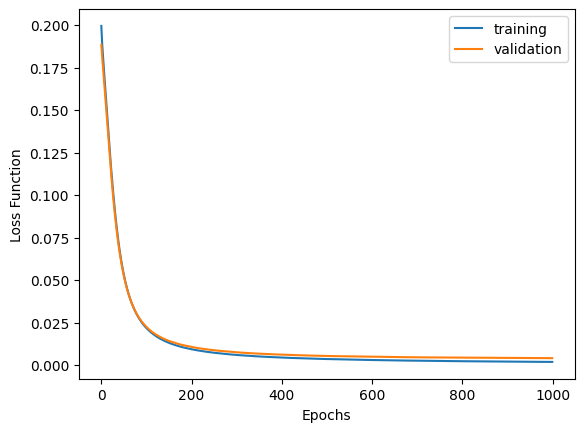

In [8]:

# model accuracy
_, acc_train = model.evaluate( x_train, y_train, verbose=0 )
_, acc_val = model.evaluate( x_val, y_val, verbose=0 )

print( 'Training Acc: {:.3f} - Validation Acc: {:.3f}'.format( acc_train, acc_val ) )

# learning Curve
plt.plot( history.history['loss'], label='training' )
plt.plot( history.history['val_loss'], label='validation' )
plt.legend()
plt.ylabel( 'Loss Function' );
plt.xlabel( 'Epochs' );

Training Acc: 1.000 - Validation Acc: 0.995


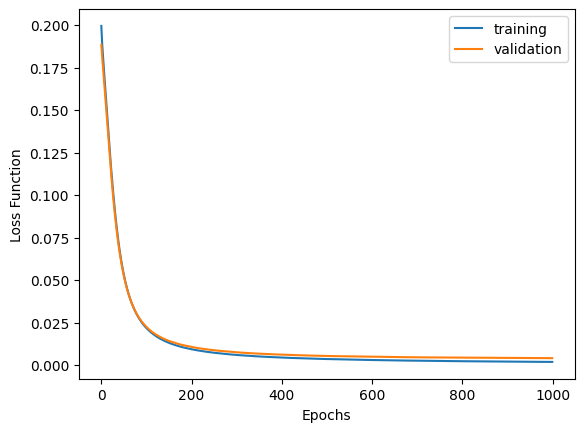

In [9]:

# model accuracy
_, acc_train = model.evaluate( x_train, y_train, verbose=0 )
_, acc_val = model.evaluate( x_val, y_val, verbose=0 )

print( 'Training Acc: {:.3f} - Validation Acc: {:.3f}'.format( acc_train, acc_val ) )

# learning Curve
plt.plot( history.history['loss'], label='training' )
plt.plot( history.history['val_loss'], label='validation' )
plt.legend()
plt.ylabel( 'Loss Function' );
plt.xlabel( 'Epochs' );

# 2.0. Overfitting the Model

In [10]:
X, y = d.make_classification( n_samples=1000, n_features=20, n_classes=2 )

Training Acc: 0.989 - Validation Acc: 0.915


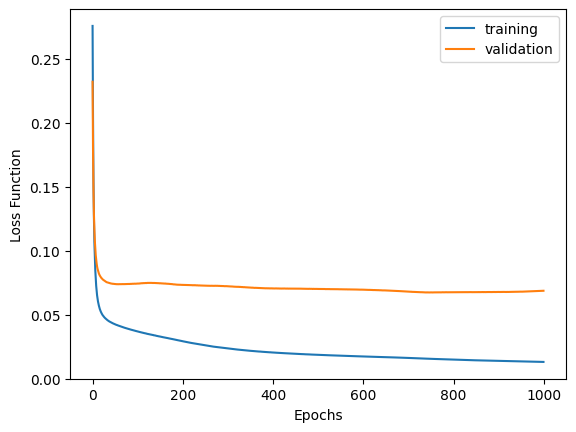

In [11]:
# split training into train and test dataset
x_train, x_val, y_train, y_val = ms.train_test_split( X, y, test_size=0.2 )

# Multi-Layer Perceptron
# model definition ( layers, neurons )
model = Sequential()

model.add( Dense( 10, input_dim=x_train.shape[1], activation='relu' ) ) # input layer, hidden layer
model.add( Dense( 1, activation='sigmoid' ) ) # output layer

# model compile ( loss, optimizer, metrics )
opt = SGD( lr=0.01, momentum=0.8 )
model.compile( loss='mean_squared_error', optimizer=opt, metrics=['accuracy'] )

# model training ( train, test, epocas)
history = model.fit( x_train, y_train, validation_data=(x_val, y_val), epochs=1000, verbose=0 )

# model accuracy
_, acc_train = model.evaluate( x_train, y_train, verbose=0 )
_, acc_val = model.evaluate( x_val, y_val, verbose=0 )

print( 'Training Acc: {:.3f} - Validation Acc: {:.3f}'.format( acc_train, acc_val ) )

# learning Curve
plt.plot( history.history['loss'], label='training' )
plt.plot( history.history['val_loss'], label='validation' )
plt.legend()
plt.ylabel( 'Loss Function' );
plt.xlabel( 'Epochs' );

# 3.0. Avoiding Overfitting

In [12]:
# Dados 
# - Coletar mais dados ( aumentar o numero de exemplos de treino)
# - Reduzir a dimensionalidade ( Features Selection )
# - Remove variáveis linearmente dependentes ou alto correlacionadas 
# - Limpeza de dados
# 
# Modelos
# - Diminuir a complexidade ( diminuir o numero de parametros )
# - Limitar o treinamento.

In [13]:
X, y = d.make_classification( n_samples=1000, n_features=20, n_classes=2 )

Training Acc: 0.576 - Validation Acc: 0.575


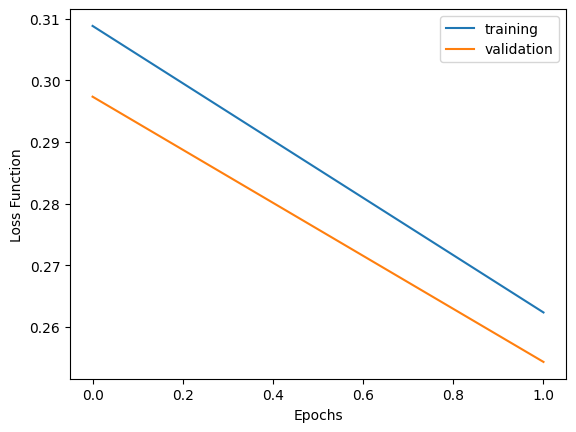

In [14]:
# split training into train and test dataset
x_train, x_val, y_train, y_val = ms.train_test_split( X, y, test_size=0.2 )

# Multi-Layer Perceptron
# model definition ( layers, neurons )
model = Sequential()

model.add( Dense( 10, input_dim=x_train.shape[1], activation='relu' ) ) # input layer, hidden layer
model.add( Dense( 1, activation='sigmoid' ) ) # output layer

# model compile ( loss, optimizer, metrics )
opt = SGD( lr=0.01, momentum=0.8 )
model.compile( loss='mean_squared_error', optimizer=opt, metrics=['accuracy'] )

# model training ( train, test, epocas)
es = EarlyStopping( monitor='val_loss', mode='auto', baseline=0.7 )
mc = ModelCheckpoint( 'best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True )

history = model.fit( x_train, y_train, validation_data=(x_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc] )

# load model
best_model = load_model( 'best_model.h5' )

# model accuracy
_, acc_train = best_model.evaluate( x_train, y_train, verbose=0 )
_, acc_val = best_model.evaluate( x_val, y_val, verbose=0 )

print( 'Training Acc: {:.3f} - Validation Acc: {:.3f}'.format( acc_train, acc_val ) )

# learning Curve
plt.plot( history.history['loss'], label='training' )
plt.plot( history.history['val_loss'], label='validation' )
plt.legend()
plt.ylabel( 'Loss Function' );
plt.xlabel( 'Epochs' );

In [ ]:
#